USING THE DATA: ASIK RT4 NWIN CLND BLNCD


RT4: 64 scans,

NWIN: WITH NEW INDO SAMPLES SCANS,

CLND: CLEANED FROM OUTLIERS,

BLNCD: THE TOTAL NUMBER ALREADY BALANCED BETWEEN THAI AND NON-THAI

In [19]:
import pandas as pd
import numpy as np

# Retry loading the data_0set
data_0 = pd.read_csv(r"C:\Users\pingk\Downloads\fadhli nitip\asik_rt4_NWIN_CLND_BLNCD_2.csv")

# Check the columns and first few rows of the data_0
data_0_info = data_0.info()
data_0_head = data_0.head()

# Check for empty cells and NaN values
nan_summary = data_0.isna().sum()

data_0_info, data_0_head, nan_summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Columns: 6960 entries, prov_char to predictions
dtypes: float64(6950), int64(2), object(8)
memory usage: 16.1+ MB


(None,
   prov_char country_char               wavenumber   649.893   650.376  \
 0       SUX           ID  ID-SUX-069-2309-002_005  0.019580  0.020577   
 1       SUX           ID  ID-SUX-074-2311-001_005  0.015026  0.014997   
 2       KTX           ID  ID-KTX-068-2306-002_104  0.007675  0.007844   
 3       SGR           MY  MY-SGR-096-2401-002_NCB  0.007805  0.006585   
 4       SSX           ID  ID-SSX-068-2307-028_202  0.011577  0.012206   
 
     650.858    651.34   651.822   652.304   652.786  ...  3999.158   3999.64  \
 0  0.021276  0.021531  0.021289  0.020601  0.019603  ...  0.000612  0.000631   
 1  0.015173  0.015566  0.016130  0.016762  0.017332  ... -0.000344 -0.000257   
 2  0.008136  0.008477  0.008800  0.009070  0.009293  ...  0.002002  0.002076   
 3  0.005669  0.005116  0.004945  0.005136  0.005631  ...  0.001007  0.001068   
 4  0.012885  0.013565  0.014162  0.014576  0.014721  ...  0.000027  0.000041   
 
    4000.122  tgp_name  dgp_name  fgp_name  country_name  t

In [20]:
print(data_0.describe(include='all'))

       prov_char country_char               wavenumber     649.893  \
count        304          304                      304  304.000000   
unique        24            3                      302         NaN   
top          KTX           TH  ID-SSX-068-2307-028_001         NaN   
freq          41          152                        2         NaN   
mean         NaN          NaN                      NaN    0.013914   
std          NaN          NaN                      NaN    0.008246   
min          NaN          NaN                      NaN   -0.076966   
25%          NaN          NaN                      NaN    0.012156   
50%          NaN          NaN                      NaN    0.014559   
75%          NaN          NaN                      NaN    0.017111   
max          NaN          NaN                      NaN    0.025054   

           650.376     650.858      651.34     651.822     652.304  \
count   304.000000  304.000000  304.000000  304.000000  304.000000   
unique         NaN 

In [21]:
data_1 = data_0.copy()

In [22]:
# Delete the specified columns
data_1 = data_0.drop(columns=['thnoth_name_encoded', 'predictions', 'country_char'])

# Rename the column 'wavenumber' to 'sample_code'
data_1 = data_1.rename(columns={'wavenumber': 'sample_code'})

# Display the first few rows of the modified data_1frame
print(data_1.head())

  prov_char              sample_code   649.893   650.376   650.858    651.34  \
0       SUX  ID-SUX-069-2309-002_005  0.019580  0.020577  0.021276  0.021531   
1       SUX  ID-SUX-074-2311-001_005  0.015026  0.014997  0.015173  0.015566   
2       KTX  ID-KTX-068-2306-002_104  0.007675  0.007844  0.008136  0.008477   
3       SGR  MY-SGR-096-2401-002_NCB  0.007805  0.006585  0.005669  0.005116   
4       SSX  ID-SSX-068-2307-028_202  0.011577  0.012206  0.012885  0.013565   

    651.822   652.304   652.786   653.268  ...  3998.194  3998.676  3999.158  \
0  0.021289  0.020601  0.019603  0.018484  ...  0.000519  0.000571  0.000612   
1  0.016130  0.016762  0.017332  0.017710  ... -0.000411 -0.000396 -0.000344   
2  0.008800  0.009070  0.009293  0.009507  ...  0.001873  0.001933  0.002002   
3  0.004945  0.005136  0.005631  0.006331  ...  0.001088  0.001014  0.001007   
4  0.014162  0.014576  0.014721  0.014544  ... -0.000060 -0.000010  0.000027   

    3999.64  4000.122  tgp_name  dgp_n

In [23]:
from sklearn.cross_decomposition import PLSRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler



Scaled Data

In [24]:
# Separate features_1 and target variables
features_1 = data_1.drop(columns=['prov_char', 'sample_code', 'tgp_name', 'dgp_name', 'fgp_name', 'country_name', 'thnoth_name'])
targets_1 = data_1['tgp_name']

# Encode the target labels
targets_1_encoded = pd.get_dummies(targets_1).values

# Standardize the features_1
scaler_1 = StandardScaler()
X_scaled_1 = scaler_1.fit_transform(features_1)

# Perform PLS-DA
pls_1 = PLSRegression(n_components=2)
pls_1.fit(X_scaled_1, targets_1_encoded)
loadings_1 = pls_1.x_loadings_

In [25]:
# Create a plot for the loadings
wavenumbers_1 = np.arange(650, 4000, (4000-650)/loadings_1.shape[0])
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0, 0.5, 'Loadings')

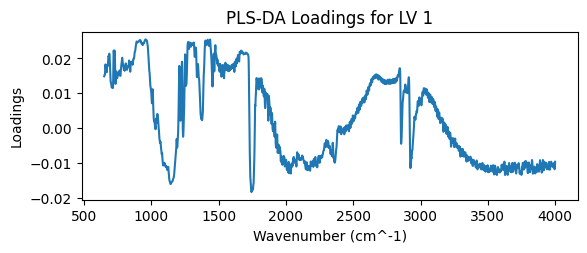

In [26]:
# Plot loadings for first component
plt.subplot(2, 1, 1)
plt.plot(wavenumbers_1, loadings_1[:, 0])
plt.title('PLS-DA Loadings for LV 1')
plt.xlabel('Wavenumber (cm^-1)')
plt.ylabel('Loadings')

Text(0, 0.5, 'Loadings')

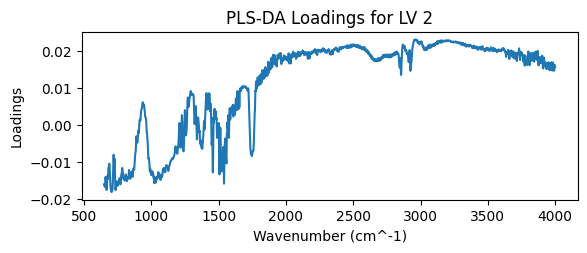

In [27]:
# Plot loadings for second component
plt.subplot(2, 1, 2)
plt.plot(wavenumbers_1, loadings_1[:, 1])
plt.title('PLS-DA Loadings for LV 2')
plt.xlabel('Wavenumber (cm^-1)')
plt.ylabel('Loadings')

In [28]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

Unscaled Data

In [29]:
data_2 = data_1.copy()

In [30]:
# Separate features_1 and target variables
features_2 = data_2.drop(columns=['prov_char', 'sample_code', 'tgp_name', 'dgp_name', 'fgp_name', 'country_name', 'thnoth_name'])
targets_2 = data_2['tgp_name']

# Encode the target labels
targets_2_encoded = pd.get_dummies(targets_2).values


X_scaled_1 = features_2

# Perform PLS-DA
pls_2 = PLSRegression(n_components=2)
pls_2.fit(X_scaled_1, targets_1_encoded)
loadings_1 = pls_2.x_loadings_

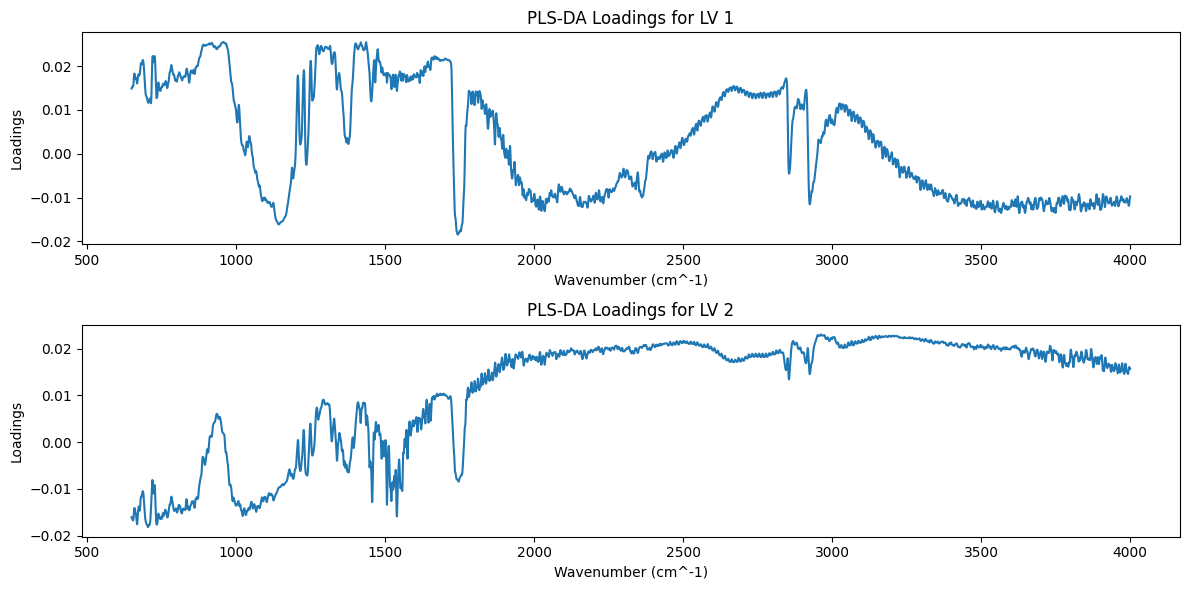

In [31]:
# Create a plot for the loadings
wavenumbers_1 = np.arange(650, 4000, (4000-650)/loadings_1.shape[0])
plt.figure(figsize=(12, 6))

# Plot loadings for first component
plt.subplot(2, 1, 1)
plt.plot(wavenumbers_1, loadings_1[:, 0])
plt.title('PLS-DA Loadings for LV 1')
plt.xlabel('Wavenumber (cm^-1)')
plt.ylabel('Loadings')

# Plot loadings for second component
plt.subplot(2, 1, 2)
plt.plot(wavenumbers_1, loadings_1[:, 1])
plt.title('PLS-DA Loadings for LV 2')
plt.xlabel('Wavenumber (cm^-1)')
plt.ylabel('Loadings')

plt.tight_layout()
plt.show()

PLS-DA Scatter Plot

In [32]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [33]:
data_3 = data_2.copy()

In [34]:
# Separate features_3 and target variables
features_3 = data_3.drop(columns=['prov_char', 'sample_code', 'tgp_name', 'dgp_name', 'fgp_name', 'country_name', 'thnoth_name'])
targets_3 = data_3['tgp_name']

Scaled

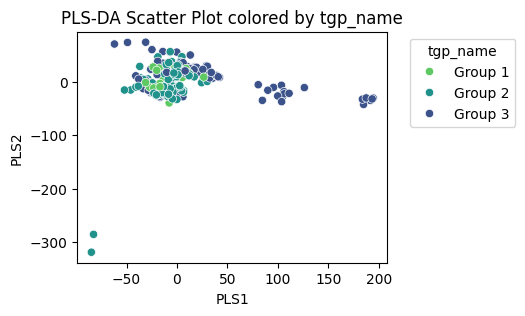

In [38]:
# Encode the target labels_3
label_encoder_3 = LabelEncoder()
targets_3_encoded = label_encoder_3.fit_transform(targets_3)

# Standardize the features_3
scaler = StandardScaler()
X_scaled_3 = scaler.fit_transform(features_3)

# Perform PLS_3-DA
pls_3 = PLSRegression(n_components=2)
X_pls_3 = pls_3.fit_transform(X_scaled_3, targets_3_encoded)[0]

# Create a DataFrame for the PLS_3-DA results
pls_3_df = pd.DataFrame(data=X_pls_3, columns=['PLS1', 'PLS2'])
pls_3_df['tgp_name'] = targets_3

# Plotting PLS_3-DA scatter_3 plot
plt.figure(figsize=(4, 3))
scatter_3 = sns.scatterplot(data=pls_3_df, x='PLS1', y='PLS2', hue='tgp_name', palette='viridis')
plt.title('PLS-DA Scatter Plot colored by tgp_name')
plt.xlabel('PLS1')
plt.ylabel('PLS2')

# Set legend in alphabetical order
handles_3, labels_3 = scatter_3.get_legend_handles_labels()
sorted_labels_3 = sorted(zip(labels_3, handles_3), key=lambda t: t[0])
labels_3, handles_3 = zip(*sorted_labels_3)
plt.legend(handles_3, labels_3, title='tgp_name', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

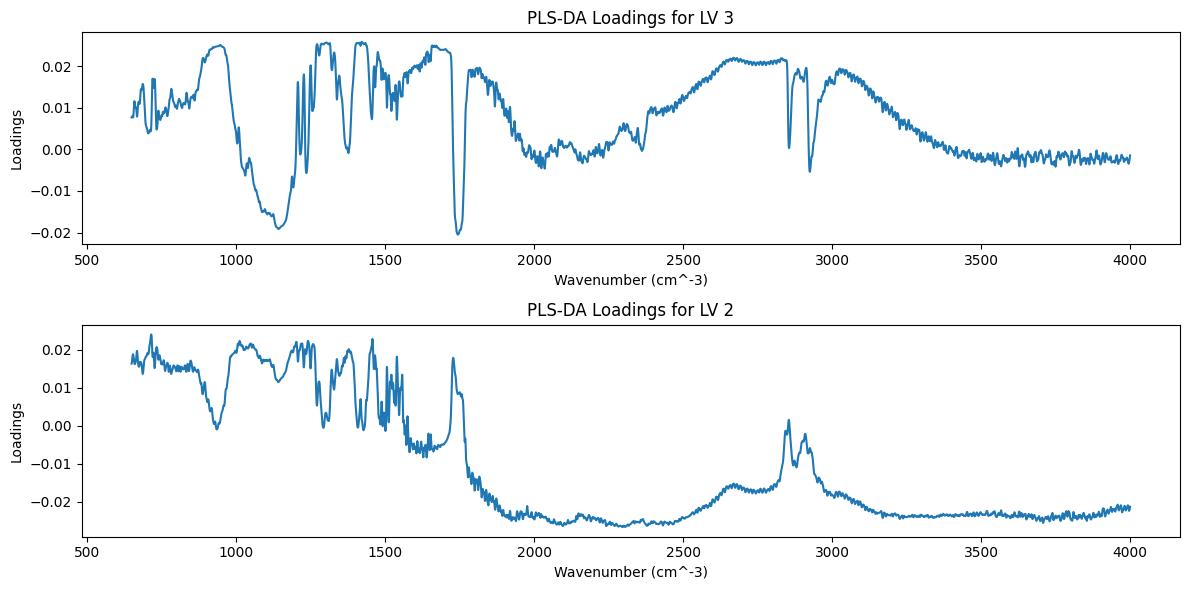

In [55]:
loadings_3 = pls_3.x_loadings_

# Create a plot for the loadings
wavenumbers_3 = np.arange(650, 4000, (4000-650)/loadings_3.shape[0])
plt.figure(figsize=(12, 6))

# Plot loadings for first component
plt.subplot(2, 1, 1)
plt.plot(wavenumbers_3, loadings_3[:, 0])
plt.title('PLS-DA Loadings for LV 3')
plt.xlabel('Wavenumber (cm^-3)')
plt.ylabel('Loadings')

# Plot loadings for second component
plt.subplot(2, 1, 2)
plt.plot(wavenumbers_3, loadings_3[:, 1])
plt.title('PLS-DA Loadings for LV 2')
plt.xlabel('Wavenumber (cm^-3)')
plt.ylabel('Loadings')

plt.tight_layout()
plt.show()

Unscaled

In [41]:
data_4 = data_2.copy()

In [42]:
# Separate features_4 and target variables
features_4 = data_4.drop(columns=['prov_char', 'sample_code', 'tgp_name', 'dgp_name', 'fgp_name', 'country_name', 'thnoth_name'])
targets_4 = data_4['tgp_name']

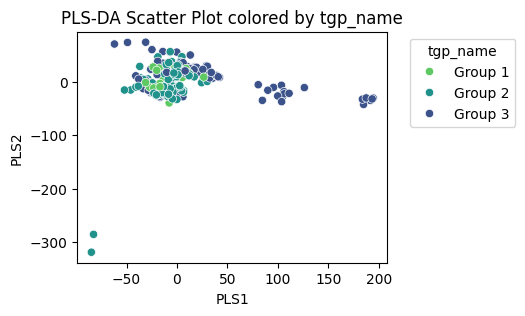

In [43]:
# Encode the target labels_4
label_encoder_4 = LabelEncoder()
targets_4_encoded = label_encoder_4.fit_transform(targets_4)

# Standardize the features_4
X_scaled_4 = features_4

# Perform PLS_4-DA
pls_4 = PLSRegression(n_components=2)
X_pls_4 = pls_4.fit_transform(X_scaled_4, targets_4_encoded)[0]

# Create a DataFrame for the PLS_4-DA results
pls_4_df = pd.DataFrame(data=X_pls_4, columns=['PLS1', 'PLS2'])
pls_4_df['tgp_name'] = targets_4

# Plotting PLS_4-DA scatter plot
plt.figure(figsize=(4, 3))
scatter = sns.scatterplot(data=pls_4_df, x='PLS1', y='PLS2', hue='tgp_name', palette='viridis')
plt.title('PLS-DA Scatter Plot colored by tgp_name')
plt.xlabel('PLS1')
plt.ylabel('PLS2')

# Set legend in alphabetical order
handles_4, labels_4 = scatter.get_legend_handles_labels()
sorted_labels_4 = sorted(zip(labels_4, handles_4), key=lambda t: t[0])
labels_4, handles_4 = zip(*sorted_labels_4)
plt.legend(handles_4, labels_4, title='tgp_name', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

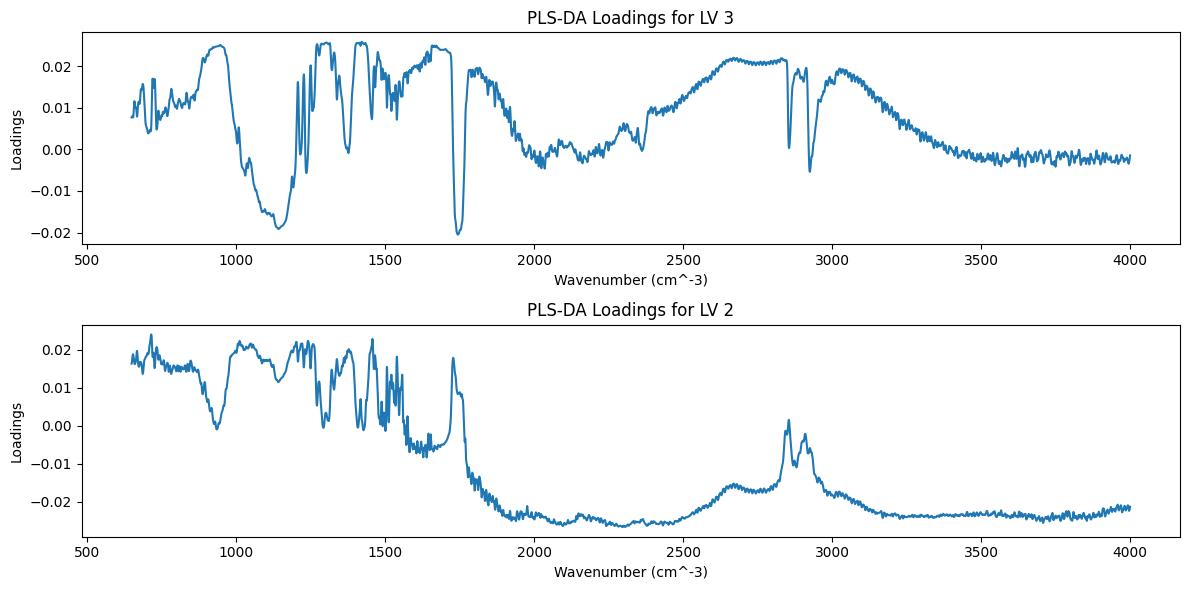

In [56]:
loadings_4 = pls_4.x_loadings_

# Create a plot for the loadings
wavenumbers_4 = np.arange(650, 4000, (4000-650)/loadings_4.shape[0])
plt.figure(figsize=(12, 6))

# Plot loadings for first component
plt.subplot(2, 1, 1)
plt.plot(wavenumbers_4, loadings_4[:, 0])
plt.title('PLS-DA Loadings for LV 3')
plt.xlabel('Wavenumber (cm^-3)')
plt.ylabel('Loadings')

# Plot loadings for second component
plt.subplot(2, 1, 2)
plt.plot(wavenumbers_4, loadings_4[:, 1])
plt.title('PLS-DA Loadings for LV 2')
plt.xlabel('Wavenumber (cm^-3)')
plt.ylabel('Loadings')

plt.tight_layout()
plt.show()

DGP

In [44]:
# Separate features_4 and target variables
features_5 = data_4.drop(columns=['prov_char', 'sample_code', 'tgp_name', 'dgp_name', 'fgp_name', 'country_name', 'thnoth_name'])
targets_5 = data_4['dgp_name']

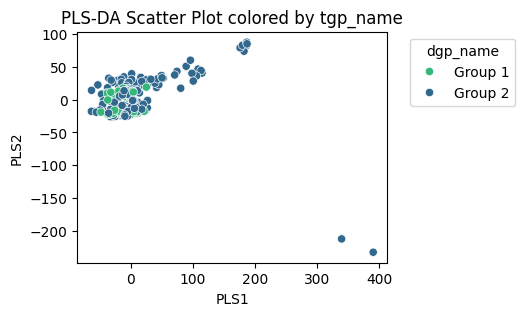

In [45]:
# Encode the target labels_5
label_encoder_5 = LabelEncoder()
targets_5_encoded = label_encoder_5.fit_transform(targets_5)

# Standardize the features_5
X_scaled_5 = features_5

# Perform PLS_5-DA
pls_5 = PLSRegression(n_components=2)
X_pls_5 = pls_5.fit_transform(X_scaled_5, targets_5_encoded)[0]

# Create a DataFrame for the PLS_5-DA results
pls_5_df = pd.DataFrame(data=X_pls_5, columns=['PLS1', 'PLS2'])
pls_5_df['dgp_name'] = targets_5

# Plotting PLS_5-DA scatter plot
plt.figure(figsize=(4, 3))
scatter = sns.scatterplot(data=pls_5_df, x='PLS1', y='PLS2', hue='dgp_name', palette='viridis')
plt.title('PLS-DA Scatter Plot colored by tgp_name')
plt.xlabel('PLS1')
plt.ylabel('PLS2')

# Set legend in alphabetical order
handles_5, labels_5 = scatter.get_legend_handles_labels()
sorted_labels_5 = sorted(zip(labels_5, handles_5), key=lambda t: t[0])
labels_5, handles_5 = zip(*sorted_labels_5)
plt.legend(handles_5, labels_5, title='dgp_name', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

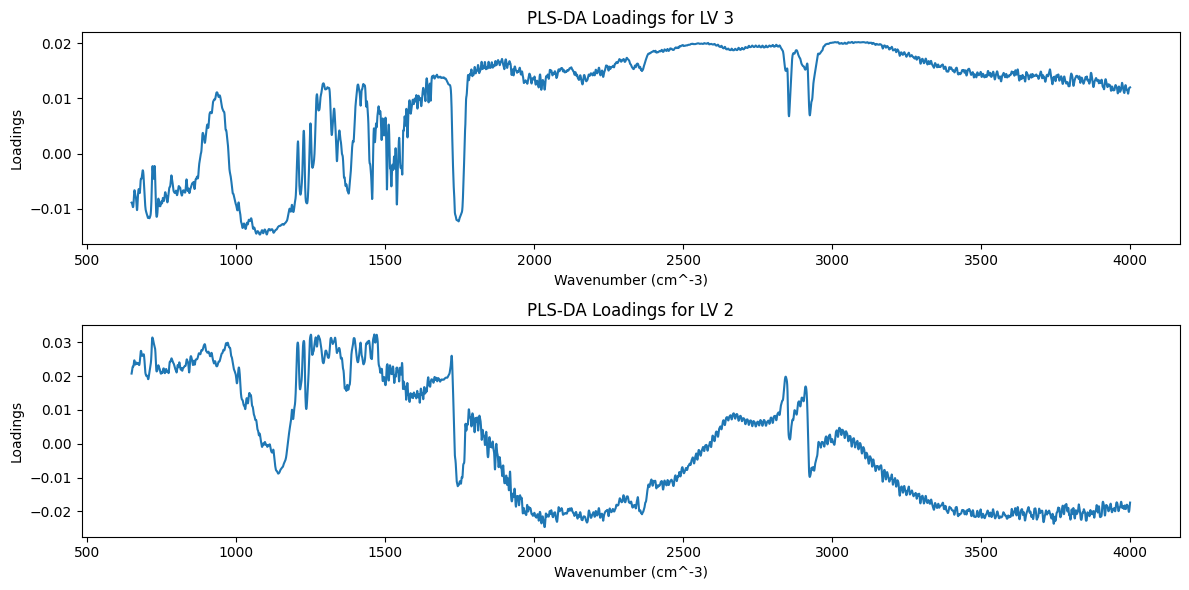

In [57]:
loadings_5 = pls_5.x_loadings_

# Create a plot for the loadings
wavenumbers_5 = np.arange(650, 4000, (4000-650)/loadings_5.shape[0])
plt.figure(figsize=(12, 6))

# Plot loadings for first component
plt.subplot(2, 1, 1)
plt.plot(wavenumbers_5, loadings_5[:, 0])
plt.title('PLS-DA Loadings for LV 3')
plt.xlabel('Wavenumber (cm^-3)')
plt.ylabel('Loadings')

# Plot loadings for second component
plt.subplot(2, 1, 2)
plt.plot(wavenumbers_5, loadings_5[:, 1])
plt.title('PLS-DA Loadings for LV 2')
plt.xlabel('Wavenumber (cm^-3)')
plt.ylabel('Loadings')

plt.tight_layout()
plt.show()

FGP

In [46]:
# Separate features_4 and target variables
features_6 = data_4.drop(columns=['prov_char', 'sample_code', 'tgp_name', 'dgp_name', 'fgp_name', 'country_name', 'thnoth_name'])
targets_6 = data_4['fgp_name']

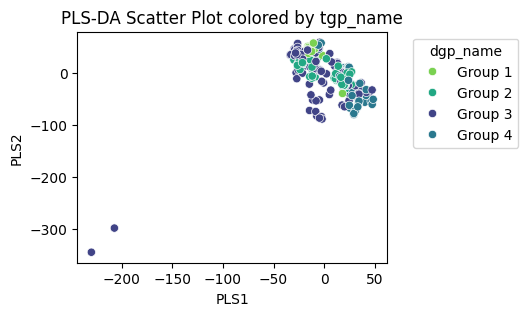

In [47]:
# Encode the target labels_6
label_encoder_6 = LabelEncoder()
targets_6_encoded = label_encoder_6.fit_transform(targets_6)

# Standardize the features_6
X_scaled_6 = features_6

# Perform PLS_6-DA
pls_6 = PLSRegression(n_components=2)
X_pls_6 = pls_6.fit_transform(X_scaled_6, targets_6_encoded)[0]

# Create a DataFrame for the PLS_6-DA results
pls_6_df = pd.DataFrame(data=X_pls_6, columns=['PLS1', 'PLS2'])
pls_6_df['dgp_name'] = targets_6

# Plotting PLS_6-DA scatter plot
plt.figure(figsize=(4, 3))
scatter = sns.scatterplot(data=pls_6_df, x='PLS1', y='PLS2', hue='dgp_name', palette='viridis')
plt.title('PLS-DA Scatter Plot colored by tgp_name')
plt.xlabel('PLS1')
plt.ylabel('PLS2')

# Set legend in alphabetical order
handles_6, labels_6 = scatter.get_legend_handles_labels()
sorted_labels_6 = sorted(zip(labels_6, handles_6), key=lambda t: t[0])
labels_6, handles_6 = zip(*sorted_labels_6)
plt.legend(handles_6, labels_6, title='dgp_name', bbox_to_anchor=(1.06, 1), loc='upper left')

plt.show()

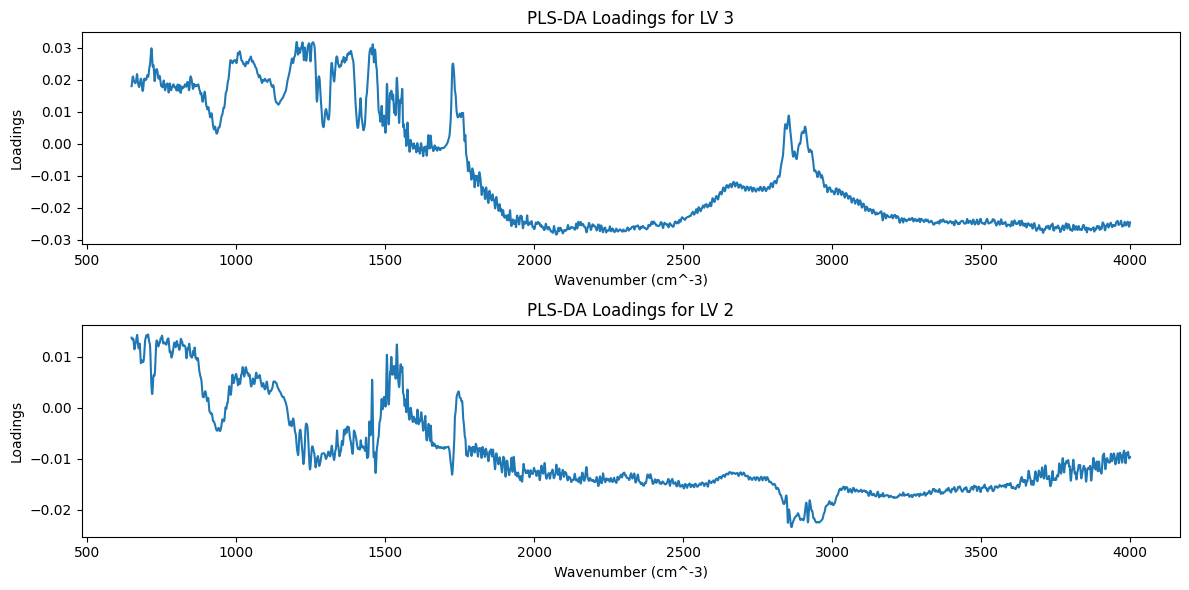

In [58]:
loadings_6 = pls_6.x_loadings_

# Create a plot for the loadings
wavenumbers_6 = np.arange(650, 4000, (4000-650)/loadings_6.shape[0])
plt.figure(figsize=(12, 6))

# Plot loadings for first component
plt.subplot(2, 1, 1)
plt.plot(wavenumbers_6, loadings_6[:, 0])
plt.title('PLS-DA Loadings for LV 3')
plt.xlabel('Wavenumber (cm^-3)')
plt.ylabel('Loadings')

# Plot loadings for second component
plt.subplot(2, 1, 2)
plt.plot(wavenumbers_6, loadings_6[:, 1])
plt.title('PLS-DA Loadings for LV 2')
plt.xlabel('Wavenumber (cm^-3)')
plt.ylabel('Loadings')

plt.tight_layout()
plt.show()

country_name

In [48]:
# Separate features_4 and target variables
features_7 = data_4.drop(columns=['prov_char', 'sample_code', 'tgp_name', 'dgp_name', 'fgp_name', 'country_name', 'thnoth_name'])
targets_7 = data_4['country_name']

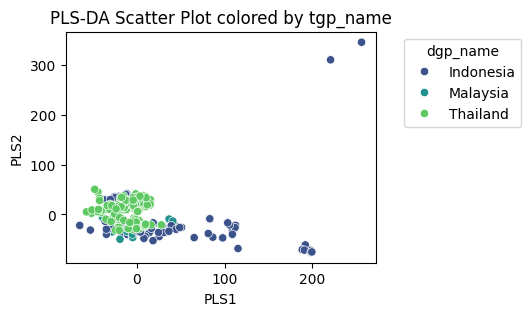

In [49]:
# Encode the target labels_7
label_encoder_7 = LabelEncoder()
targets_7_encoded = label_encoder_7.fit_transform(targets_7)

# Standardize the features_7
X_scaled_7 = features_7

# Perform PLS_7-DA
pls_7 = PLSRegression(n_components=2)
X_pls_7 = pls_7.fit_transform(X_scaled_7, targets_7_encoded)[0]

# Create a DataFrame for the PLS_7-DA results
pls_7_df = pd.DataFrame(data=X_pls_7, columns=['PLS1', 'PLS2'])
pls_7_df['country_name'] = targets_7

# Plotting PLS_7-DA scatter plot
plt.figure(figsize=(4, 3))
scatter = sns.scatterplot(data=pls_7_df, x='PLS1', y='PLS2', hue='country_name', palette='viridis')
plt.title('PLS-DA Scatter Plot colored by tgp_name')
plt.xlabel('PLS1')
plt.ylabel('PLS2')

# Set legend in alphabetical order
handles_7, labels_7 = scatter.get_legend_handles_labels()
sorted_labels_7 = sorted(zip(labels_7, handles_7), key=lambda t: t[0])
labels_7, handles_7 = zip(*sorted_labels_7)
plt.legend(handles_7, labels_7, title='country_name', bbox_to_anchor=(1.07, 1), loc='upper left')

plt.show()

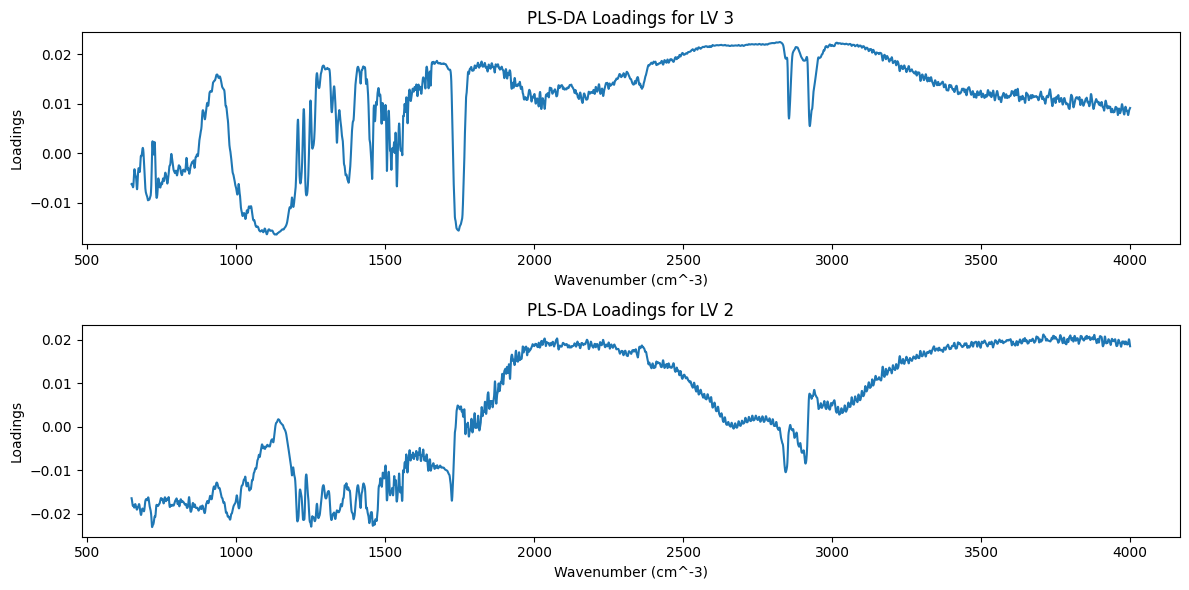

In [59]:
loadings_7 = pls_7.x_loadings_

# Create a plot for the loadings
wavenumbers_7 = np.arange(650, 4000, (4000-650)/loadings_7.shape[0])
plt.figure(figsize=(12, 6))

# Plot loadings for first component
plt.subplot(2, 1, 1)
plt.plot(wavenumbers_7, loadings_7[:, 0])
plt.title('PLS-DA Loadings for LV 3')
plt.xlabel('Wavenumber (cm^-3)')
plt.ylabel('Loadings')

# Plot loadings for second component
plt.subplot(2, 1, 2)
plt.plot(wavenumbers_7, loadings_7[:, 1])
plt.title('PLS-DA Loadings for LV 2')
plt.xlabel('Wavenumber (cm^-3)')
plt.ylabel('Loadings')

plt.tight_layout()
plt.show()

Thai/Non-Thai

In [50]:
# Separate features_4 and target variables
features_8 = data_4.drop(columns=['prov_char', 'sample_code', 'tgp_name', 'dgp_name', 'fgp_name', 'country_name', 'thnoth_name'])
targets_8 = data_4['thnoth_name']

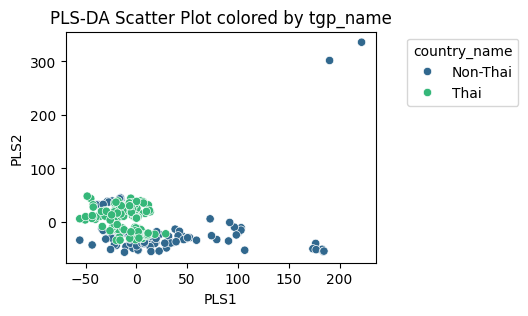

In [51]:
# Encode the target labels_8
label_encoder_8 = LabelEncoder()
targets_8_encoded = label_encoder_8.fit_transform(targets_8)

# Standardize the features_8
X_scaled_8 = features_8

# Perform PLS_8-DA
pls_8 = PLSRegression(n_components=2)
X_pls_8 = pls_8.fit_transform(X_scaled_8, targets_8_encoded)[0]

# Create a DataFrame for the PLS_8-DA results
pls_8_df = pd.DataFrame(data=X_pls_8, columns=['PLS1', 'PLS2'])
pls_8_df['country_name'] = targets_8

# Plotting PLS_8-DA scatter plot
plt.figure(figsize=(4, 3))
scatter = sns.scatterplot(data=pls_8_df, x='PLS1', y='PLS2', hue='country_name', palette='viridis')
plt.title('PLS-DA Scatter Plot colored by tgp_name')
plt.xlabel('PLS1')
plt.ylabel('PLS2')

# Set legend in alphabetical order
handles_8, labels_8 = scatter.get_legend_handles_labels()
sorted_labels_8 = sorted(zip(labels_8, handles_8), key=lambda t: t[0])
labels_8, handles_8 = zip(*sorted_labels_8)
plt.legend(handles_8, labels_8, title='country_name', bbox_to_anchor=(1.08, 1), loc='upper left')

plt.show()

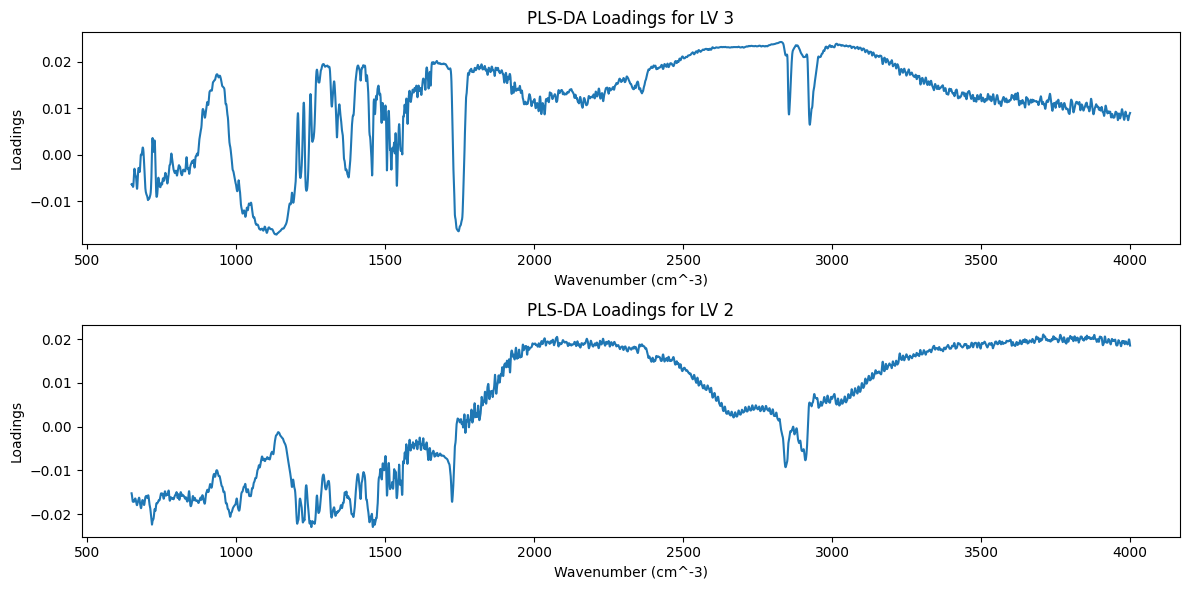

In [60]:
loadings_8 = pls_8.x_loadings_

# Create a plot for the loadings
wavenumbers_8 = np.arange(650, 4000, (4000-650)/loadings_8.shape[0])
plt.figure(figsize=(12, 6))

# Plot loadings for first component
plt.subplot(2, 1, 1)
plt.plot(wavenumbers_8, loadings_8[:, 0])
plt.title('PLS-DA Loadings for LV 3')
plt.xlabel('Wavenumber (cm^-3)')
plt.ylabel('Loadings')

# Plot loadings for second component
plt.subplot(2, 1, 2)
plt.plot(wavenumbers_8, loadings_8[:, 1])
plt.title('PLS-DA Loadings for LV 2')
plt.xlabel('Wavenumber (cm^-3)')
plt.ylabel('Loadings')

plt.tight_layout()
plt.show()